Deep Learning 2:<br> 
March 26, 2025 <br>

Group 2:<br>
Sam Emami-101575471<br>
Srivatsan Rangarajan- 101571286<br>
Mansi Kharb- 101562748<br>
Tarunsai Chukkala-101543772<br>
Anusha Gundlapalli-101560347<br>
Augustine Pullattu Chachochin-101540402<br>
Rutul Patel-101539636<br>
Bisman Singh-101543040<br>

Project Title: -------------------------------------------------------------------<br>
**Real-Time Face Emotion Action System (CompanionAI)**<br>
This application capture live webcam video and recognize the face in the frames and according to the specific<br> 
emotions of the face trigger an action.

**Tools and datasets used in this project:** Models, Datasets, and Experiments<br>

Models: -------------------------------------------------------------------------------------------<br>
**Motion and Object Detection**: YOLOv8 for real-time object detection working with OpenCV (cv2) for fundamental image processing and motion detection.<br><br>
**Emotion Detection**: DINO-ViT by Facebook for Emotion Recognition (State-of-the-art transformer model).<br>
<br><br>
Datasets: ------------------------------------------------------------------------------------------<br>
<br>
**COCO**: <br> 
Number of Images: Approximately 330,000 images.<br>
Object Instances: Over 1.5 million object instances are annotated.<br>
Object Categories: 80 object categories. 91 "stuff" categories.<br>
COCO is a very common dataset used for pre-training object detection models is the **COCO** (Common Objects in<br> 
Context) dataset. This dataset provides a wide variety of labeled objects in complex scenes, which helps the model learn general<br> object detection capabilities. Labels examples are Person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, <br>
traffic light, fire hydrant, stop sign, parking meter, bench<br><br>
**affectnet-yolo-format** for Fine-Tunning DINO-ViT<br>
affectnet-yolo-format refers to a specific way of organizing the AffectNet dataset to be compatible with the YOLO (You Only Look Once) object detection model. It is a subset of AffectNet with 23129 images. AffectNet itself is a large-scale database of facial expressions.<br>
It contains millions of facial images annotated with categorical emotion labels (e.g., happiness, sadness, anger) and valence-arousal values.<br><br>
**Converting AffectNet_YOLO_format to DINO compatible structure**: To use the AffectNet_YOLO_format data to fine-tune a DINO<br> (Distilling Knowledge in Neural Networks) or a Vision Transformer (ViT) model, we need to restructure the data to be compatible with<br> their training requirements, which are significantly different from YOLO's. This practice is conducted during the process.<br>
While we restructured the dataset for DINO compatibility, we split it to traingin dataset with 17101 images and a validation dataset with 5406 images.<br>
Affectnet dataset we have used for training has a total of 17101 images with the following distribution for 8 different emotion classids:<br>

classid-----count<br>
0-----------2339<br>
1-----------1996<br>
2-----------2242<br>
3-----------2021<br>
4-----------2154<br>
5-----------1616<br>
6-----------1914<br>
7-----------2819<br>
Sum------17101

<br>
The dataset is quite well balanced overall — no extreme class imbalance.<br> 
But there’s still enough variation in frequency that it might slightly bias our model<br> 
(especially if using shuffle=True in the DataLoader without any sampling strategy).<br>

<br><br>
Experiments: ------------------------------------------------------------------------------------------<br>
1- Converting dataset AffectNet-YOLO-Format to DINO compatible format<br>
2- Fine Tunning the whole DINO model and analysing the performance.<br>
3- Increasing the instances in the dataset and training again to improve performance from 8.70% to 11.95%.<br> 
4- Performed Transfer Learning by training just the head layer of the DINO ViT, and using augmentation to achieve 27.50% accuracy.<br> 
Because we did not change the training of the feature extraction layers which already trained over a large dataset. 



 

 

 





Some more details:<br>
**YOLO**<br>
YOLO is based on CNN architechture.<br>
YOLO divides an image into a grid and simultaneously predict boundingboxes and class probabilities for each grid cell.<br>
Some newer YOLO models are utilizing transformer layers in their backbones.<br>
YOLOS (You Only Look at One Sequence) is a object detection model that does utilize vision transformer architecture. So that is a vision transformer based object detection model.<br>
it's designed to be versatile and trainable on custom datasets.<br>
YOLOv8 is designed to be versatile and trainable on custom datasets. YOLOv8, like many object detection models, is often pre-trained
on large, general-purpose datasets.<br> 
A very common dataset used for pre-training object detection models is the **COCO** (Common Objects in<br> 
Context) dataset. This dataset provides a wide variety of labeled objects in complex scenes, which helps the model learn general<br> object detection capabilities. Labels examples are Person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, <br>
traffic light, fire hydrant, stop sign, parking meter, bench<br>

<br>
**Vision Transformers (ViTs)**:<br>
ViTs divide an image into patches and treat these patches as "tokens," similar to words in a sentence. They excel at capturing long-range dependencies within an image, which can be beneficial for object detection.<br>
<br>
**"facebook/dino-vitb16"**<br> 
Refers to a specific ViT (Vision Transformer) model that was trained using the DINO (Distilling the Knowledge in a Neural Network) self-supervised learning method.<br>
<br>
**DINO**<br>
DINO pretrained on self-supervised contrastive learning on unlabeled images. It excels at capturing object shapes and image structures and generating embeddings that reflect image similarity; however, this pre-training focuses on broad visual understanding, not specific task-oriented features like emotion recognition, necessitating fine-tuning for specialized applications.<br> 
For instance here for facial emotion detection we are fine-tunning it with a labled dataset of different facial emotions.<br>


In [5]:
!kaggle datasets download -d fatihkgg/affectnet-yolo-format
!unzip affectnet-yolo-format.zip -d ../datasets/affectnet

Dataset URL: https://www.kaggle.com/datasets/fatihkgg/affectnet-yolo-format
License(s): MIT




  0%|          | 0.00/258M [00:00<?, ?B/s]
  0%|          | 1.00M/258M [00:00<00:35, 7.61MB/s]
  2%|▏         | 6.00M/258M [00:00<00:09, 27.4MB/s]
  4%|▍         | 11.0M/258M [00:00<00:06, 37.1MB/s]
  6%|▌         | 15.0M/258M [00:00<00:08, 31.8MB/s]
  7%|▋         | 19.0M/258M [00:00<00:08, 28.4MB/s]
  9%|▊         | 22.0M/258M [00:00<00:09, 27.0MB/s]
 10%|▉         | 25.0M/258M [00:00<00:08, 28.1MB/s]
 11%|█         | 28.0M/258M [00:01<00:10, 23.2MB/s]
 12%|█▏        | 31.0M/258M [00:01<00:10, 22.2MB/s]
 13%|█▎        | 34.0M/258M [00:01<00:09, 23.7MB/s]
 14%|█▍        | 37.0M/258M [00:01<00:09, 24.3MB/s]
 15%|█▌        | 40.0M/258M [00:01<00:09, 24.8MB/s]
 17%|█▋        | 43.0M/258M [00:01<00:09, 24.9MB/s]
 18%|█▊        | 46.0M/258M [00:01<00:08, 25.0MB/s]
 19%|█▉        | 49.0M/258M [00:02<00:08, 25.2MB/s]
 20%|██        | 52.0M/258M [00:02<00:08, 25.2MB/s]
 21%|██▏       | 55.0M/258M [00:02<00:08, 25.0MB/s]
 22%|██▏       | 58.0M/258M [00:02<00:08, 25.4MB/s]
 24%|██▎       | 61.

**To fine-tune a DINO model using the AffectNet dataset, <br>we need to convert the YOLO-formatted 
annotations into a <br> CSV format compatible with our training pipeline.**<br>

In YOLO format, each image has a corresponding .txt file (in the lable folder) containing annotations. 
Each line in the .txt file represents one object, formatted as:
<br><br>
"class_id, x_center, y_center, width, height" 
<br>
> class_id: Integer representing the object's class.<br><br>
> x_center, y_center: Normalized coordinates of the bounding box center (values between 0 and 1).<br><br>
> width, height: Normalized width and height of the bounding box.<br><br>

for YOLO we have images in 3 different folders including test, train, valid. But for DINO we put them 
all into two folders including images and labels.<br>    
This script reads each .txt file, calculates the absolute **bounding box** coordinates, and writes them to 
annotations.csv.<br>
CSV file's columns: image_path, class_id, x_min, y_min, x_max, y_max



In [ ]:
!pip install Pillow

Restructuing Affectnet-YOLO-Format dataset to DINO compatible structure:

In [1]:
import os
import pandas as pd
from PIL import Image

def yolo_to_csv(images_dir, labels_dir, output_csv):
    data = []
    
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            # Get image base name
            image_base = label_file.replace('.txt', '')
            possible_extensions = ['.jpg', '.png']  # Possible image formats

            # Find the correct image file
            image_file = None
            for ext in possible_extensions:
                temp_path = os.path.join(images_dir, image_base + ext)
                if os.path.exists(temp_path):
                    image_file = image_base + ext
                    image_path = temp_path
                    break  # Stop checking once found

            if image_file is None:
                print(f"Warning: No matching image found for label {label_file}")
                continue  # Skip this label file

            label_path = os.path.join(labels_dir, label_file)

            # Open image to get dimensions
            with Image.open(image_path) as img:
                img_width, img_height = img.size

            # Read label file
            with open(label_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())

                    # Convert normalized coordinates to absolute pixel values
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height
                    x_min = int(x_center - width / 2)
                    y_min = int(y_center - height / 2)
                    x_max = int(x_center + width / 2)
                    y_max = int(y_center + height / 2)

                    data.append([image_path, int(class_id), x_min, y_min, x_max, y_max])

    # Create DataFrame and save to CSV
    df = pd.DataFrame(data, columns=['image_path', 'class_id', 'x_min', 'y_min', 'x_max', 'y_max'])
    df.to_csv(output_csv, index=False)


# Example usage
base_path = '../datasets/Affectnet/2_AffectNet_DINO_format'

images_dir = os.path.join(base_path, 'images')
labels_dir = os.path.join(base_path, 'labels')

output_csv = 'annotations.csv'
yolo_to_csv(images_dir, labels_dir, output_csv)



**fine-tunning DINO-ViT on AffectNet for better emotion recognition.**
> Load images & labels from annotations.csv.<br>
> Use tf.data.Dataset for efficient data loading.<br>
> Fine-tune DINO-ViT (via keras_cv.models.VisionTransformerClassifier).

In [ ]:
import os
import torch
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Define paths
dataset_dir = "dataset"  # Update this if your dataset is in a different folder
annotations_file = "annotations.csv"

# Load the annotations CSV
df = pd.read_csv(annotations_file)

# Load DINO-ViT model
'''  
ViTForImageClassification.from_pretrained(...): 
This is a function from the Hugging Face Transformers library. It's designed to download and load pre-trained models.
It downloads the weights from the Hugging Face Model Hub, which hosts the pre-trained "facebook/dino-vitb16" model.
The downloaded weights are then loaded into the ViTForImageClassification model.
'''
'''  
num_labels=8: This argument modifies the final classification head of the model to have 8 output neurons, 
corresponding to your 8 emotion labels. This is a form of transfer learning. Even though the backbone of the network 
is pretrained, the classification head is randomly initialized, and then trained on your data.
'''

# "feature_extractor" is used to preprocess input images — resizing, 
# normalizing, etc. — before feeding them to the model. We still need it even when using a custom model (MyModel).
model_name = "facebook/dino-vitb16"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name, num_labels=8)

# Define a transformation pipeline for images
# Resizing the input image to a fixed size of 224x224 pixels. 
# This is a common preprocessing step for many vision models, 
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

# Custom Dataset for AffectNet-YOLO
'''
It is a class inherited from torch.dataset and when initialized give us 
inherited dataset behavior plus our implementations.
(Dataset) after the class name AffectNetDataset signifies that 
this class inherits from the Dataset class. 

This ensures a Standard Interface so that our custom dataset can seamlessly 
integrate with PyTorch's data loading utilities like DataLoader. 
The DataLoader relies on the __len__ and __getitem__ methods to efficiently load 
and iterate over our data.
'''
class AffectNetDataset(Dataset):
    # The constructor of your class
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    # Returns the total number of samples (images)
    def __len__(self):
        return len(self.df)

    # Fetching individual data points from your dataset
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = row["image_path"]
        label = int(row["class_id"])

        # Load image
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return {"pixel_values": image, "labels": torch.tensor(label)}

# Load dataset
# df contains image paths and labels
affectnet_dataset = AffectNetDataset(df, transform=transform)
train_loader = DataLoader(affectnet_dataset, batch_size=16, shuffle=True)

# Training loop
# It is Fine_Tunning because we pass the whole model (not just the new head) to the optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(5):  # Fine-tune for 5 epochs
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        inputs, labels = batch["pixel_values"].to(device), batch["labels"].to(device)
        outputs = model(inputs).logits
        loss = torch.nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()  #Backpropagation
        optimizer.step() #update parameters
        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")

# Save fine-tuned model
save_path = "dino_vit_affectnet"
model.save_pretrained(save_path)
feature_extractor.save_pretrained(save_path)

print(f"Fine-tuned model saved at {save_path}")

#It took 2 min per 50 images to trian on an I7 CPU with 32 GIG-RAM. Total 5 epochs within 2453m 6.3s (About 0.5mb/min)


preprocessor_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

c:\Users\poura\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\poura\.cache\huggingface\hub\models--facebook--dino-vitb16. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\poura\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\

config.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at facebook/dino-vitb16 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

Epoch 1 - Loss: 1.1503
Epoch 2 - Loss: 0.7155
Epoch 3 - Loss: 0.4592
Epoch 4 - Loss: 0.2876
Epoch 5 - Loss: 0.2088
Fine-tuned model saved at dino_vit_affectnet


**Test Fine-Tunned model**

Loaded 920 test images for validation.


c:\Users\poura\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
c:\Users\poura\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTFeatureExtractor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


Validation Accuracy: 11.96%


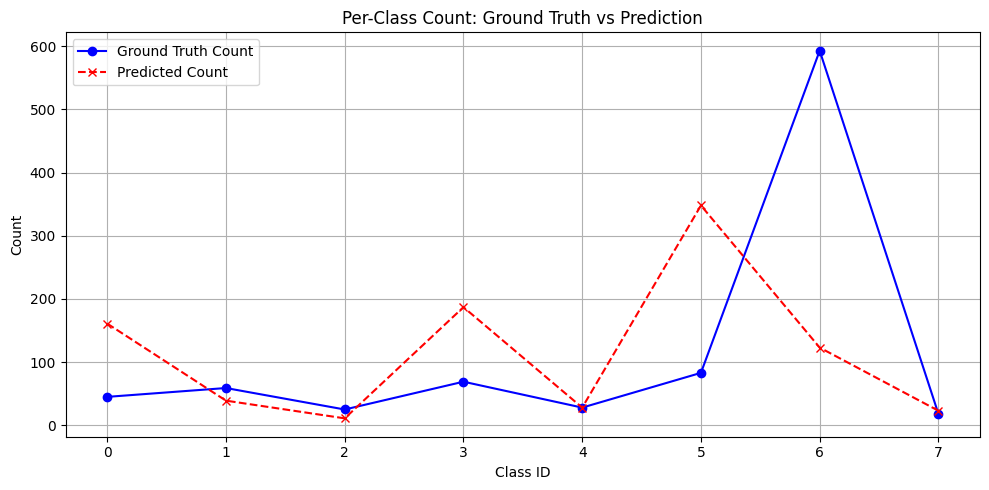

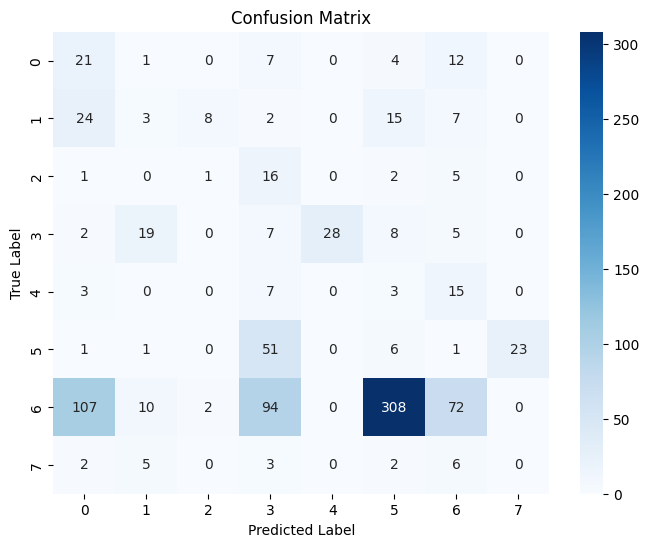

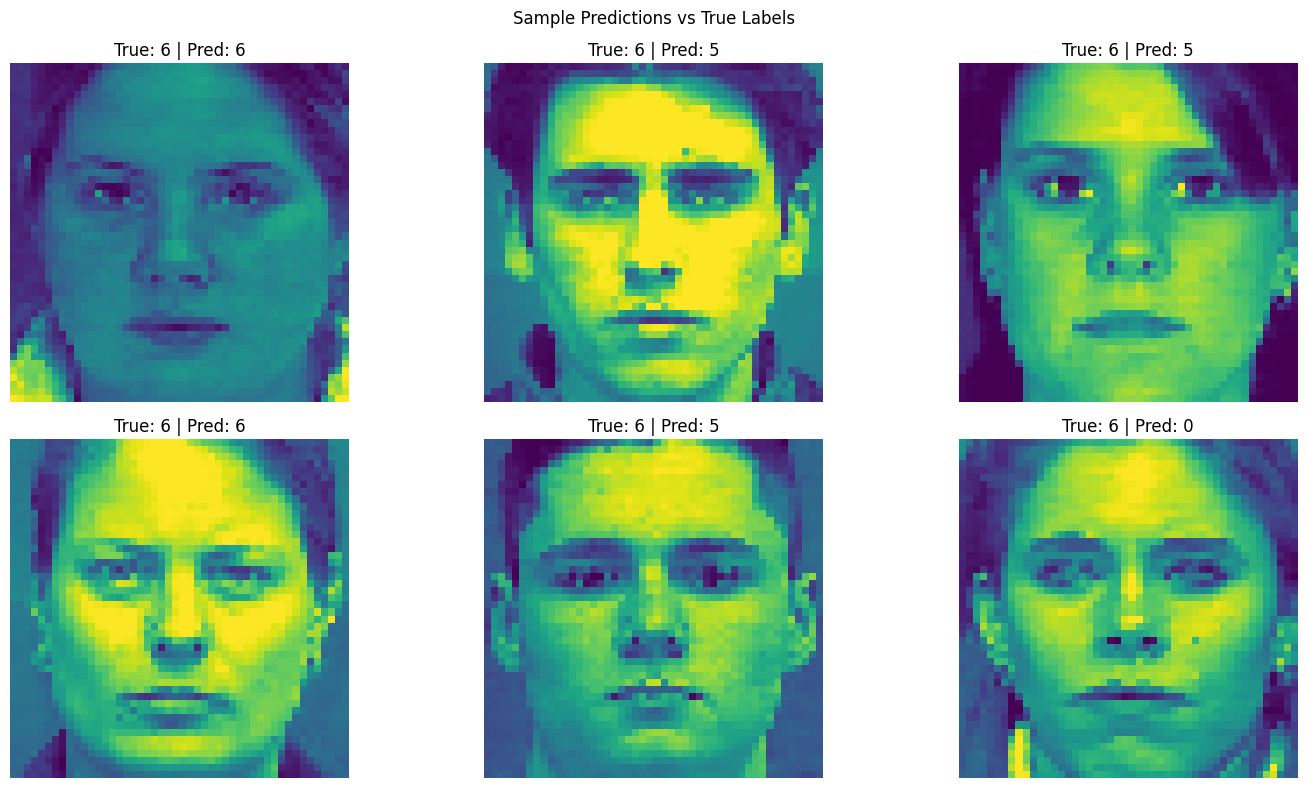

In [50]:
import torch
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from transformers import ViTForImageClassification, ViTFeatureExtractor

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load validation dataset
# validation images are located in ck_images folder which are mapped to a csv file outside that folder
df_test = pd.read_csv("../Test_Env/ck_images_annotations.csv")
df_test["image_id"] = "ck_images/" + df_test["image_id"].astype(str)

# Validation dataset class
class AffectNetTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path =  '../Test_Env/' + row["image_id"]
        label = int(row["class_id"])  # Ground truth emotion
        
        # Load and preprocess image
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return {"pixel_values": image, "labels": torch.tensor(label), "image_path": image_path}

# Now define the dataset and print the length
test_dataset = AffectNetTestDataset(df_test, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Loaded {len(test_dataset)} test images for validation.")

###################################

# Load fine-tuned model
fine_tuned_model_path = "../dino_vit_affectnet"  # Path to my saved fine-tuned model
model = ViTForImageClassification.from_pretrained(fine_tuned_model_path)
feature_extractor = ViTFeatureExtractor.from_pretrained(fine_tuned_model_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set model to evaluation mode
model.eval()

# Inference loop
correct_predictions = 0
total_samples = 0

predictions = []  # Store results for later evaluation


with torch.no_grad():
    for batch in test_loader:
        '''
            inputs, labels, image_paths = batch["pixel_values"].to(device), batch["labels"].to(device), batch["image_path"]
            Using feature extractor optimized the accuracy by 43% from 8.37% to 11.96% which is still low
        '''
        images = [Image.open(img_path).convert("RGB") for img_path in batch["image_path"]]
        encoding = feature_extractor(images=images, return_tensors="pt", padding=True)

        inputs = encoding["pixel_values"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(inputs).logits
        predicted_labels = torch.argmax(outputs, dim=1)  # Get class with highest probability

        # Count correct predictions
        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

        # Store predictions
        for img_path, true_label, pred_label in zip(batch["image_path"], labels.cpu().numpy(), predicted_labels.cpu().numpy()):
            predictions.append([img_path, true_label, pred_label])

# Compute accuracy
accuracy = correct_predictions / total_samples * 100
print(f"Validation Accuracy: {accuracy:.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predictions to arrays
img_paths, true_labels, pred_labels = zip(*predictions)


# Count occurrences of each class
true_counter = Counter(true_labels)
pred_counter = Counter(pred_labels)

# Get all class IDs (e.g., 0–7)
class_ids = sorted(set(true_labels) | set(pred_labels))

# Build count arrays
true_counts = [true_counter.get(cid, 0) for cid in class_ids]
pred_counts = [pred_counter.get(cid, 0) for cid in class_ids]

# 1. Per-Class Count Line Plot
plt.figure(figsize=(10, 5))
plt.plot(class_ids, true_counts, label="Ground Truth Count", color="blue", marker="o")
plt.plot(class_ids, pred_counts, label="Predicted Count", color="red", marker="x", linestyle="--")
plt.xticks(class_ids)
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.title("Per-Class Count: Ground Truth vs Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. 🔹 Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. 🔹 Plot Some Predictions vs Labels
num_samples = 6
plt.figure(figsize=(15, 8))

for i in range(num_samples):
    image = Image.open(img_paths[i])
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title(f"True: {true_labels[i]} | Pred: {pred_labels[i]}")
    plt.axis("off")

plt.suptitle("Sample Predictions vs True Labels")
plt.tight_layout()
plt.show()



**Transfer Learning** with **Data Augmentation**

In [ ]:
#Just this time perform transfer learning instead of fine tunning:

import os 
import torch
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Define paths
dataset_dir = "dataset"  # Update this if your dataset is in a different folder
annotations_file = "annotations_fixed.csv"

# Load the annotations CSV
df = pd.read_csv(annotations_file)
'''  
df["image_path"] = df["image_path"].str.replace("\\", "/", regex=False)
df.to_csv("annotations_fixed.csv", index=False)
df = pd.read_csv("annotations_fixed.csv")
'''

# Load DINO-ViT model
'''  
ViTForImageClassification.from_pretrained(...): 
This is a function from the Hugging Face Transformers library. It's designed to download and load pre-trained models.
It downloads the weights from the Hugging Face Model Hub, which hosts the pre-trained "facebook/dino-vitb16" model.
The downloaded weights are then loaded into the ViTForImageClassification model.
'''
'''  
num_labels=8: This argument modifies the final classification head of the model to have 8 output neurons, 
corresponding to your 8 emotion labels. This is a form of transfer learning. Even though the backbone of the network 
is pretrained, the classification head is randomly initialized, and then trained on your data.
'''

# "feature_extractor" is used to preprocess input images — resizing, 
# normalizing, etc. — before feeding them to the model. We still need it even when using a custom model (MyModel).
model_name = "facebook/dino-vits16"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name, num_labels=8)
# Note#1
# We set all backbone layers to False, Only classifier layers remains True 
for name, param in model.named_parameters():
    if "classifier" not in name:
        param.requires_grad = False

# Define a transformation pipeline for images
# Resizing the input image to a fixed size of 224x224 pixels. 
# This is a common preprocessing step for many vision models, 
# Note#2:
# Adding Data Augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.RandomHorizontalFlip(p=0.5), # Data Augmentation
    transforms.RandomRotation(15),          # Data Augmentation
    transforms.ToTensor()
])

# Custom Dataset for AffectNet-YOLO
'''
It is a class inherited from torch.dataset and when initialized give us 
inherited dataset behavior plus our implementations.
(Dataset) after the class name AffectNetDataset signifies that 
this class inherits from the Dataset class. 

This ensures a Standard Interface so that our custom dataset can seamlessly 
integrate with PyTorch's data loading utilities like DataLoader. 
The DataLoader relies on the __len__ and __getitem__ methods to efficiently load 
and iterate over our data.
'''
class AffectNetDataset(Dataset):
    def __init__(self, df, base_dir="", transform=None):  # base_dir is now ""
        self.transform = transform
        self.samples = []

        for _, row in df.iterrows():
            rel_path = str(row["image_path"]).replace("\\", "/").lstrip("/")  # normalize and remove accidental leading slash
            image_path = os.path.normpath(os.path.join(base_dir, rel_path))  # safe join

            if os.path.exists(image_path):
                self.samples.append((image_path, int(row.get("class_id", -1))))
            else:
                print(f"[Missing] {image_path}")

        print(f"✅ Total valid images: {len(self.samples)}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_path, label = self.samples[idx]
        try:
            image = Image.open(image_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return self.__getitem__((idx + 1) % len(self.samples))

        if self.transform:
            image = self.transform(image)
        return {"pixel_values": image, "labels": torch.tensor(label)}



# Load dataset
# df contains image paths and labels
affectnet_dataset = AffectNetDataset(df, base_dir="", transform=transform)

#affectnet_dataset = AffectNetDataset(df, transform=transform)
train_loader = DataLoader(affectnet_dataset, batch_size=16, shuffle=True)

# Training loop
# Note#1:
# This time we try Transfer Learning to ensures that only trainable (non-frozen) parameters are passed to the optimizer
# And the optimizer only updates the classifier, since it's the only part with requires_grad=True.
# .backward() does not compute gradients for frozen layers, the optimizer doesn’t touch them (because they’re not in its parameter list)
# Replace:
# optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
# With:
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(5):  # Tr_Lr for 5 epochs
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        inputs, labels = batch["pixel_values"].to(device), batch["labels"].to(device)
        outputs = model(inputs).logits
        loss = torch.nn.CrossEntropyLoss()(outputs, labels)
        # Note#1:
        # Backpropagation does not compute gradients for frozen layers. The optimizer doesnt touch them 
        # (because theyre not in its parameter list)
        loss.backward()  
        optimizer.step() # update parameters
        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")

# Note#1:
# Save Tr_Lr ed model
save_path = "dino_vit_affectnet_TrLr"
model.save_pretrained(save_path)
feature_extractor.save_pretrained(save_path)

print(f"Transfer Learned model saved at {save_path}")

# For Fine-Tunning It took 2 min per 50 images to trian on an I7 CPU with 32 GIG-RAM. Total 5 epochs within 2453m 6.3s (About 0.5mb/min)
# Transfer learning might take ~40 sec to 1.3 min for the same batch size.

'''   
We get this warning "Some weights of ViTForImageClassification were not initialized" which is fine since
the classifier head is being randomly initialized for our custom task with 8 classes — 
this is exactly what we want in transfer learning.
We should train this model on our dataset — so we can safely ignore this warning.
266m.46.6s for 17101 image of around 17k each.
'''


c:\Users\poura\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Total valid images: 17101
Epoch 1 - Loss: 2.1047
Epoch 2 - Loss: 1.7460
Epoch 3 - Loss: 1.6362
Epoch 4 - Loss: 1.5806
Epoch 5 - Loss: 1.5369
Transfer Learned model saved at dino_vit_affectnet_TrLr


'   \nWe get this warning "Some weights of ViTForImageClassification were not initialized" which is fine since\nthe classifier head is being randomly initialized for our custom task with 8 classes — \nthis is exactly what we want in transfer learning.\nWe should train this model on our dataset — so we can safely ignore this warning.\n'

Showcasing **Augmentation** during training

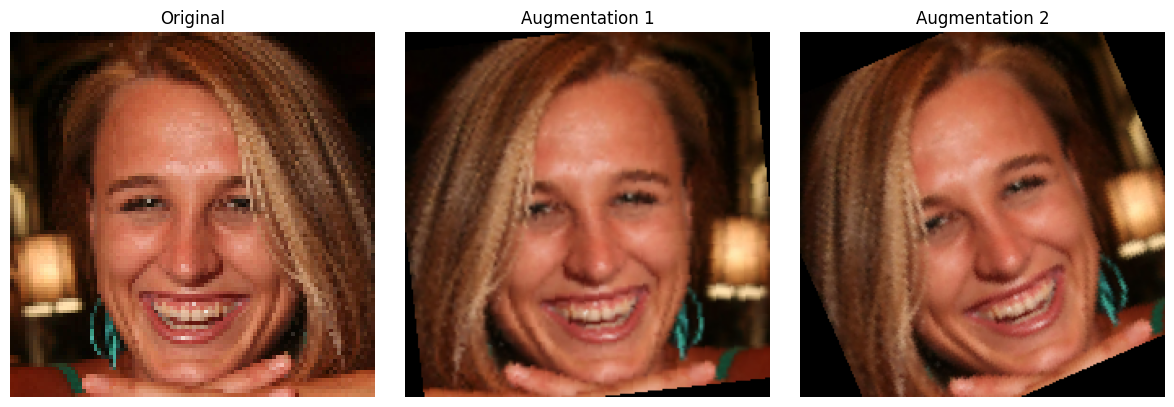

In [4]:
from PIL import Image
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load image once
image_path = "../datasets/Affectnet/2_AffectNet_DINO_format/images/ffhq_0.png"
image = Image.open(image_path).convert("RGB")
original_tensor = ToTensor()(image)

# Define transform with augmentations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=1.0),  # Always flip to show variation
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

# Generate two different augmentations
augmented_1 = transform(image)
augmented_2 = transform(image)

# Plot original + both augmented versions
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(original_tensor.permute(1, 2, 0))
axs[0].set_title("Original")

axs[1].imshow(augmented_1.permute(1, 2, 0))
axs[1].set_title("Augmentation 1")

axs[2].imshow(augmented_2.permute(1, 2, 0))
axs[2].set_title("Augmentation 2")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()


**Validation for Transfer Learning**

Loaded 920 test images for validation.


c:\Users\poura\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
c:\Users\poura\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTFeatureExtractor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


Validation Accuracy: 27.50%


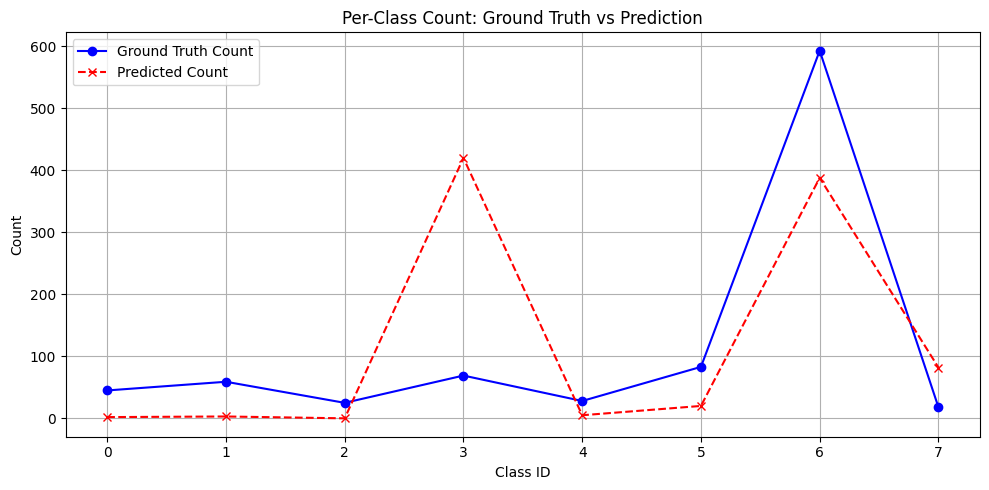

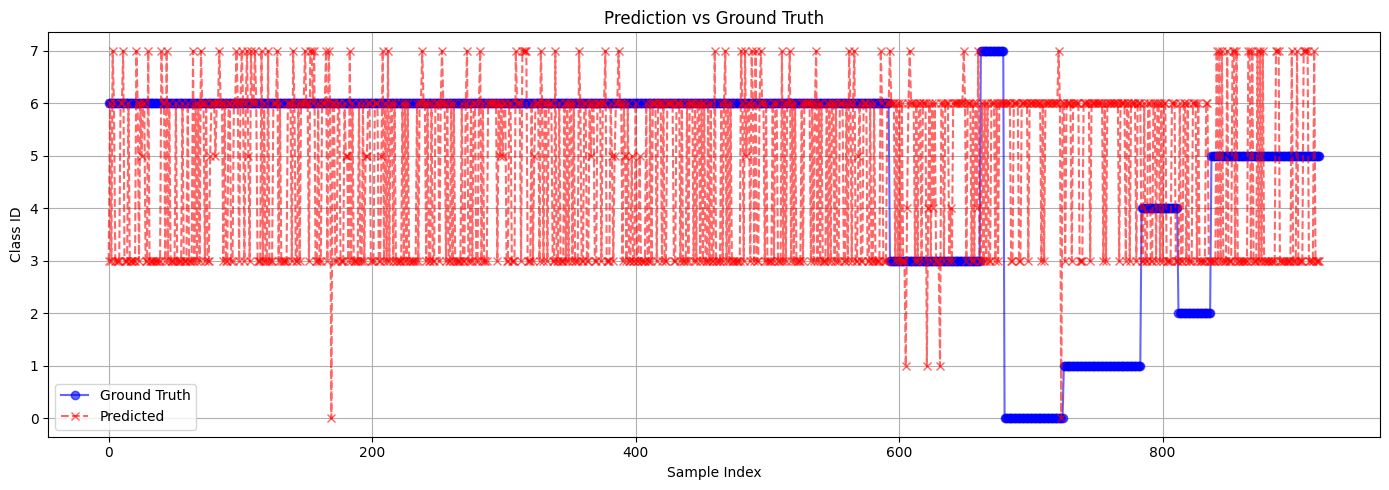

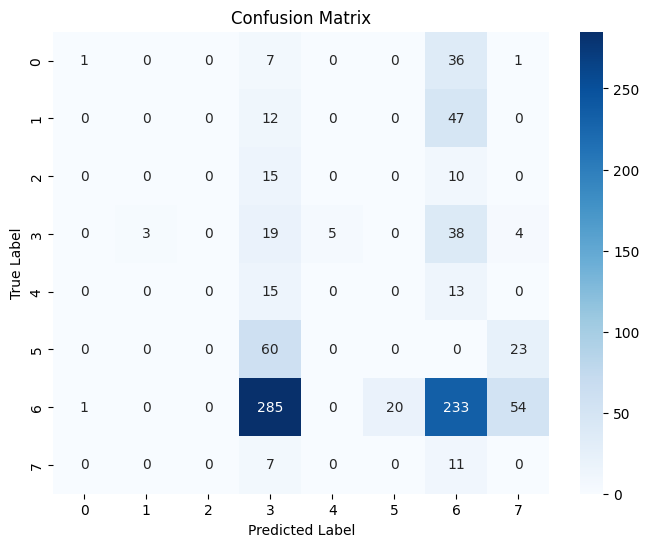

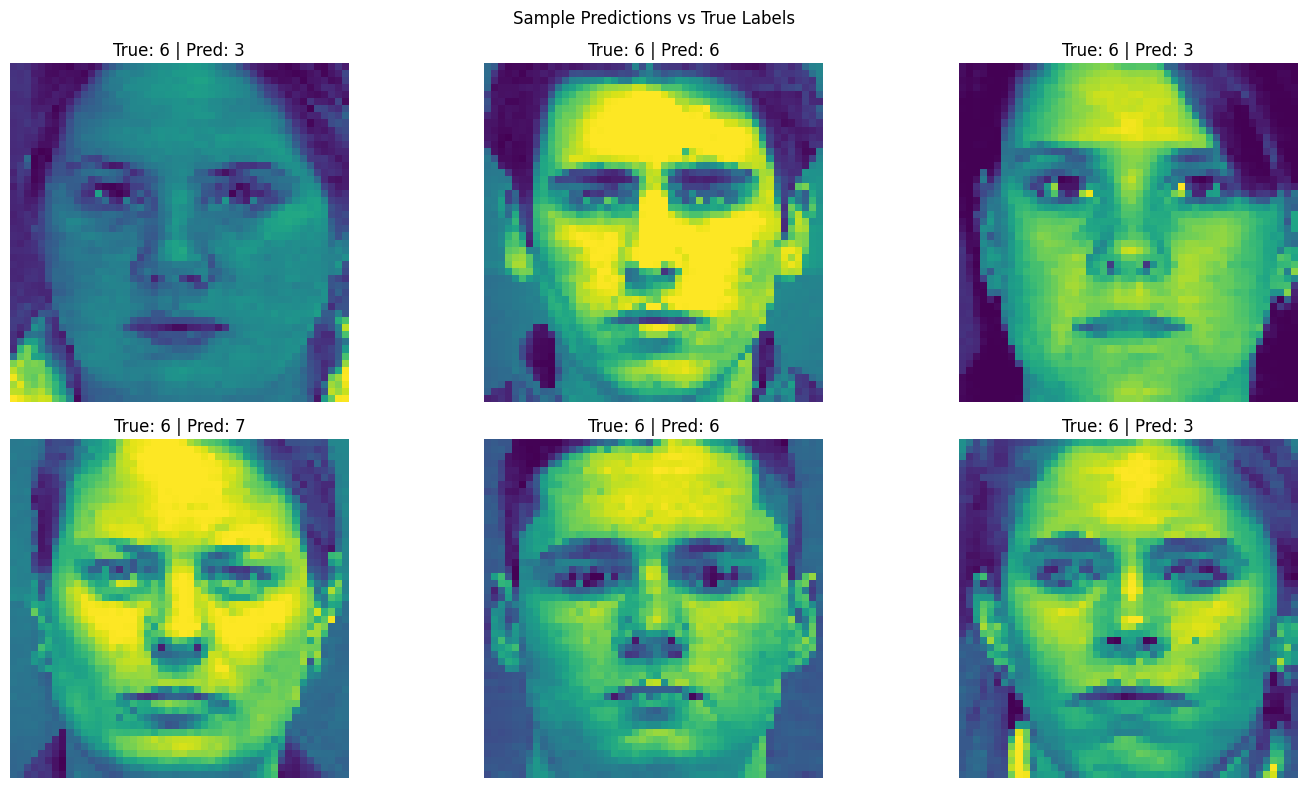

In [ ]:
import torch
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from transformers import ViTForImageClassification, ViTFeatureExtractor

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load validation dataset
# validation images are located in ck_images folder which are mapped to a csv file outside that folder
df_test = pd.read_csv("../Test_Env/ck_images_annotations.csv")
df_test["image_id"] = "ck_images/" + df_test["image_id"].astype(str)

# Validation dataset class
class AffectNetTestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path =  '../Test_Env/' + row["image_id"]
        label = int(row["class_id"])  # Ground truth emotion
        
        # Load and preprocess image
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return {"pixel_values": image, "labels": torch.tensor(label), "image_path": image_path}

# Now define the dataset and print the length
test_dataset = AffectNetTestDataset(df_test, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Loaded {len(test_dataset)} test images for validation.")

###################################

# Load partially fine-tuned (Transfer Learning) model
fine_tuned_model_path = "dino_vit_affectnet_TrLr"  # Path to my saved fine-tuned model
model = ViTForImageClassification.from_pretrained(fine_tuned_model_path)
feature_extractor = ViTFeatureExtractor.from_pretrained(fine_tuned_model_path)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set model to evaluation mode
model.eval()

# Inference loop
correct_predictions = 0
total_samples = 0

predictions = []  # Store results for later evaluation


with torch.no_grad():
    for batch in test_loader:
        '''
            inputs, labels, image_paths = batch["pixel_values"].to(device), batch["labels"].to(device), batch["image_path"]
            Using feature extractor optimized the accuracy by 43% from 8.37% to 11.96% which is still low
        '''
        images = [Image.open(img_path).convert("RGB") for img_path in batch["image_path"]]
        encoding = feature_extractor(images=images, return_tensors="pt", padding=True)

        inputs = encoding["pixel_values"].to(device)
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(inputs).logits
        predicted_labels = torch.argmax(outputs, dim=1)  # Get class with highest probability

        # Count correct predictions
        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

        # Store predictions
        for img_path, true_label, pred_label in zip(batch["image_path"], labels.cpu().numpy(), predicted_labels.cpu().numpy()):
            predictions.append([img_path, true_label, pred_label])

# Compute accuracy
accuracy = correct_predictions / total_samples * 100
print(f"Validation Accuracy: {accuracy:.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predictions to arrays
img_paths, true_labels, pred_labels = zip(*predictions)

# Count occurrences of each class
true_counter = Counter(true_labels)
pred_counter = Counter(pred_labels)

# Get all class IDs (e.g., 0–7)
class_ids = sorted(set(true_labels) | set(pred_labels))

# Build count arrays
true_counts = [true_counter.get(cid, 0) for cid in class_ids]
pred_counts = [pred_counter.get(cid, 0) for cid in class_ids]

# 1. Per-Class Count Line Plot
plt.figure(figsize=(10, 5))
plt.plot(class_ids, true_counts, label="Ground Truth Count", color="blue", marker="o")
plt.plot(class_ids, pred_counts, label="Predicted Count", color="red", marker="x", linestyle="--")
plt.xticks(class_ids)
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.title("Per-Class Count: Ground Truth vs Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Line diagram for each classid
plt.figure(figsize=(14, 5))
plt.plot(true_labels, label="Ground Truth", color="blue", linestyle="-", marker="o", alpha=0.6)
plt.plot(pred_labels, label="Predicted", color="red", linestyle="--", marker="x", alpha=0.6)
plt.title("Prediction vs Ground Truth")
plt.xlabel("Sample Index")
plt.ylabel("Class ID")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 4. Plot Some Predictions vs Labels
num_samples = 6
plt.figure(figsize=(15, 8))

for i in range(num_samples):
    image = Image.open(img_paths[i])
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title(f"True: {true_labels[i]} | Pred: {pred_labels[i]}")
    plt.axis("off")

plt.suptitle("Sample Predictions vs True Labels")
plt.tight_layout()
plt.show()

'''
model validation score improved from 11.96% in Fine-Tunning to 27.50% in Transfer Learning with Augmentation
'''


**Phase Two**: Applying trained Emotion Detection model on a live Motion Detection model frames:<br><br>
. Use a YOLO-based motion detection model to identify a moving face in live webcam feed<br>

. Feed that face into our fine-tuned DINO-ViT model for emotion classification<br>

. Trigger a “cheer up” message if emotion is: 'sad', 'contempt', or 'angry'<br>

We are using yolov8n.pt which is trained on COCO (80 classes: person, chair, car, etc.)



In [3]:
import cv2
import torch
from PIL import Image
import torchvision.transforms as transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
from ultralytics import YOLO

# ---------------------------
# 🔧 Settings
# ---------------------------
model_path = "dino_vit_affectnet_TrLr"
emotion_labels = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Angry', 'Contempt']
negative_emotions = {'Sad', 'Contempt', 'Angry'}
conf_threshold = 0.5
motion_threshold = 15
detect_every_n_frames = 5

# ---------------------------
# ✅ Load Models
# ---------------------------
model = ViTForImageClassification.from_pretrained(model_path).eval()
feature_extractor = ViTFeatureExtractor.from_pretrained(model_path)
model.to("cpu")

# Use better detection if available (e.g., 'yolov8n-face.pt')
yolo_model = YOLO("yolov8n.pt")

# ---------------------------
# 🎥 Webcam Setup
# ---------------------------
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

prev_center = None
frame_count = 0
current_label = ""

print("🚀 Live detection started. Press Q to quit.")
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    height, width, _ = frame.shape

    results = yolo_model(frame, verbose=False)[0]
    padding = 0
       
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])

        # Skip low confidence detections
        if conf < conf_threshold:
            continue
        
        # Make sure coordinates are in bounds
        x1, y1 = max(0, x1 - padding), max(0, y1 - padding)
        x2, y2 = min(width, x2 + padding), min(height, y2 + padding)

        # Track motion
        center = ((x1 + x2) // 2, (y1 + y2) // 2)
        motion = 0
        if prev_center:
            dx = abs(center[0] - prev_center[0])
            dy = abs(center[1] - prev_center[1])
            motion = dx + dy
        prev_center = center

        face_img = frame[y1:y2, x1:x2]
        if face_img.size == 0:
            continue

        # Resize and predict emotion
        pil_face = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)).resize((224, 224))
        inputs = feature_extractor(images=pil_face, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=1).item()
            current_label = emotion_labels[pred]

        # Draw bounding box + emotion label always
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)
        cv2.putText(frame, current_label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        # Action:
        # Cheer up only if motion and new frame
        #if motion > motion_threshold and frame_count % detect_every_n_frames == 0:
        if frame_count % detect_every_n_frames == 0:
            if current_label in negative_emotions:
                print(f"🧠 {current_label} → 💬 Cheer up! You're not alone.")
            else:
                print(f"🙂 Detected: {current_label}")

    # Display the frame
    cv2.imshow("🎯 Emotion Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


🚀 Live detection started. Press Q to quit.
🧠 Contempt → 💬 Cheer up! You're not alone.
🙂 Detected: Happy
🧠 Contempt → 💬 Cheer up! You're not alone.
🙂 Detected: Fear
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🙂 Detected: Disgust
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.
🧠 Contempt → 💬 Cheer up! You're not alone.